In [1]:
from comet_ml import Experiment
import sys
sys.path.append("/Users/jiang/Desktop/2270/cs227_final_project/data/data") # path to this repository
import py_ts_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import datetime
from auto_encoder import AutoEncoder, train_step, LAMBDA
from preprocess import augmentation
from tqdm import tqdm


experiment = Experiment(project_name="cs227_final", log_code=False)
experiment.log_parameters(LAMBDA)

# X_train, y_train, X_test, y_test, info = py_ts_data.load_data("TwoPatterns", variables_as_channels=True)
X_train, y_train, X_test, y_test, info = py_ts_data.load_data("GunPoint", variables_as_channels=True)
print("Dataset shape: Train: {}, Test: {}".format(X_train.shape, X_test.shape))

TS-Data path: \Users\jiang\Desktop\2270\cs227_final_project\data\data


COMET WARNING: display_summary is set in Comet config but has been deprecated; use display_summary_level instead
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



COMET INFO: Experiment is live on comet.ml https://www.comet.ml/ocfa25uw/cs227-final/9795ffe99251436586c1dfd42a35de7b



Dataset shape: Train: (50, 150, 1), Test: (150, 150, 1)


In [2]:
def min_max(data, feature_range=(0, 1)):
    """
    implements min-max scaler
    """
    min_v = feature_range[0]
    max_v = feature_range[1]
    max_vals = data.max(axis=1)[:, None, :]
    min_vals = data.min(axis=1)[:, None, :]
    X_std = (data - min_vals) / (max_vals - min_vals)
    return X_std * (max_v - min_v) + min_v

def normalize(data):
    """
    Z-normalize data with shape (x, y, z)
    x = # of timeseries
    y = len of each timeseries
    z = vars in each timeseres
    
    s.t. each array in [., :, .] (i.e. each timeseries variable)
    is zero-mean and unit stddev
    """
    sz, l, d = data.shape
    means = np.broadcast_to(np.mean(data, axis=1)[:, None, :], (sz, l, d))
    stddev = np.broadcast_to(np.std(data, axis=1)[:, None, :], (sz, l, d)) 
    return (data - means)/stddev


(50, 150, 1) (50,)
<class 'numpy.float32'>
(1550, 150, 1) (1550,)


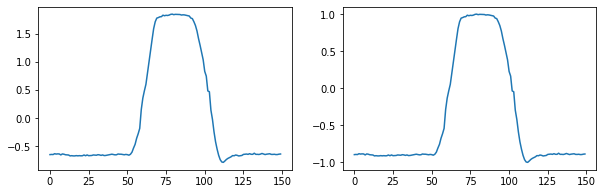

In [3]:
print(X_train.shape, y_train.shape)
X_train, y_train = augmentation(X_train, y_train)
X_test, y_test = X_test, y_test
print(X_train.shape, y_train.shape)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].plot(X_train[200])
X_train = min_max(X_train, feature_range=(-1, 1))
axs[1].plot(X_train[200])
X_test = min_max(X_test, feature_range=(-1, 1))
plt.show()


# Encode and Decode

In [4]:
kwargs = {
    "input_shape": (X_train.shape[1], X_train.shape[2]),
#     "filters": [32, 64, 128],
    "filters": [128, 64, 32],
    "kernel_sizes": [5, 5, 5],
    "code_size": 16,
}

ae = AutoEncoder(**kwargs)

# Training

  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 0: 30.117830276489258, 586.9763793945312, 24.49298858642578


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 1: 8.649079322814941, 491.01904296875, 3.7766571044921875


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 2: 7.394573211669922, 428.4395446777344, 3.1415927410125732


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 3: 7.206876754760742, 429.07794189453125, 2.9455528259277344


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 4: 6.745779037475586, 365.1106262207031, 3.125933885574341


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.42it/s]

Epoch 5: 5.930203437805176, 301.5326232910156, 2.9443211555480957


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 6: 5.395895004272461, 243.237548828125, 2.9934518337249756


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.45it/s]

Epoch 7: 3.9972310066223145, 160.9901123046875, 2.4114434719085693


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 8: 4.0434041023254395, 143.3877410888672, 2.635887622833252


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 9: 3.7007009983062744, 150.03274536132812, 2.222599744796753


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:29,  5.25it/s]

Epoch 10: 3.6584527492523193, 117.73722076416016, 2.5061419010162354


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.60it/s]

Epoch 11: 3.1718883514404297, 109.42999267578125, 2.098574638366699


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 12: 2.917586326599121, 106.57903289794922, 1.870501160621643


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.63it/s]

Epoch 13: 3.0819919109344482, 109.23173522949219, 2.0097720623016357


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 14: 3.0777480602264404, 114.896728515625, 1.9482638835906982


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 15: 2.9825150966644287, 109.37570190429688, 1.9078377485275269


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 16: 2.996535301208496, 107.40912628173828, 1.9418621063232422


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.60it/s]

Epoch 17: 2.908832550048828, 103.53496551513672, 1.8924070596694946


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 18: 2.6247076988220215, 90.66170501708984, 1.7354464530944824


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 19: 2.943913459777832, 87.91791534423828, 2.0855915546417236


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 20: 2.7883176803588867, 88.60066986083984, 1.921526551246643


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.60it/s]

Epoch 21: 2.6301276683807373, 82.83787536621094, 1.8199490308761597


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 22: 2.750103712081909, 85.43446350097656, 1.914908528327942


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 23: 2.8296151161193848, 87.54901885986328, 1.9738625288009644


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.63it/s]

Epoch 24: 2.468402624130249, 82.64156341552734, 1.6585725545883179


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 25: 2.3764617443084717, 84.82685852050781, 1.5436291694641113


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 26: 2.518012046813965, 89.6087646484375, 1.6383075714111328


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 27: 2.3594768047332764, 73.5430679321289, 1.640450119972229


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.63it/s]

Epoch 28: 2.299602746963501, 74.49143981933594, 1.5703914165496826


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 29: 2.5350091457366943, 85.01031494140625, 1.7019248008728027


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.60it/s]

Epoch 30: 2.3117153644561768, 75.87388610839844, 1.568663239479065


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 31: 2.4658944606781006, 76.86398315429688, 1.7143985033035278


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 32: 2.408097267150879, 74.11177825927734, 1.683817744255066


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.48it/s]

Epoch 33: 2.073974847793579, 64.75537109375, 1.440828561782837


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 34: 2.2814736366271973, 80.48805236816406, 1.4915093183517456


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.45it/s]

Epoch 35: 2.3549957275390625, 83.0478515625, 1.5399154424667358


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 36: 2.2549407482147217, 68.27596282958984, 1.5880627632141113


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 37: 2.5181820392608643, 73.7150650024414, 1.79902184009552


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.42it/s]

Epoch 38: 2.2007265090942383, 70.14828491210938, 1.5143871307373047


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.51it/s]

Epoch 39: 2.2684435844421387, 65.80706024169922, 1.6266391277313232


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 40: 2.3556101322174072, 74.17620849609375, 1.6301500797271729


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 41: 2.4050345420837402, 63.98625946044922, 1.7830017805099487


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 42: 2.0621721744537354, 59.66543197631836, 1.4803212881088257


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.63it/s]

Epoch 43: 2.132206916809082, 61.76117706298828, 1.5298945903778076


  0%|                                                                                                                                                                                    | 0/155 [00:00<?, ?it/s]

Epoch 44: 2.2544193267822266, 66.71407318115234, 1.603312373161316


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.54it/s]

Epoch 45: 2.050964832305908, 69.80657196044922, 1.3665635585784912


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.57it/s]

Epoch 46: 2.330824136734009, 70.0604476928711, 1.6466861963272095


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:27,  5.63it/s]

Epoch 47: 2.236814022064209, 69.01905822753906, 1.562245488166809


  1%|█                                                                                                                                                                           | 1/155 [00:00<00:28,  5.36it/s]

Epoch 48: 2.248159408569336, 69.9869613647461, 1.5639290809631348


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 155/155 [00:27<00:00,  5.54it/s]


Epoch 49: 2.0899715423583984, 63.4749755859375, 1.4699207544326782


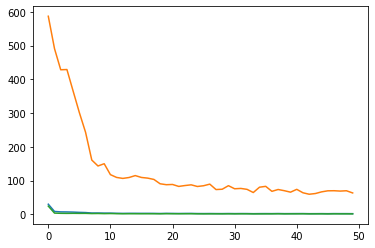

In [5]:
EPOCHS = 50
BATCH = 10
SHUFFLE_BUFFER = 100
K = len(set(y_train))

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER).batch(BATCH)

loss_history = []
sim_history = []
re_history = []

with experiment.train():
    for epoch in range(EPOCHS):
        total_loss = 0
        total_sim = 0
        total_re = 0
    #     for i, (input, _) in enumerate(train_dataset):
        for (input, _) in tqdm(train_dataset):
            loss, similarity_loss, reconstruction_loss = train_step(input, ae)
    #         if i % 100 == 0:
    #             print(loss)
            total_loss += loss
            total_sim += similarity_loss
            total_re += reconstruction_loss
        experiment.log_metric("loss", loss)
        experiment.log_metric("similarity_loss", total_sim)
        experiment.log_metric("reconstruction_loss", total_re)
        loss_history.append(total_loss)
        sim_history.append(total_sim)
        re_history.append(total_re)
        print("Epoch {}: {}, {}, {}".format(epoch, total_loss, total_sim, total_re))
    #     break

    # ae.save('mymodel')
    plt.plot(loss_history)
    plt.plot(sim_history)
    plt.plot(re_history)

# Test

## Evaluate reconstruction

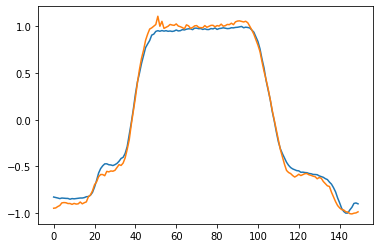

Mean L2 distance: 1.1663789749145508


In [10]:
code_test = ae.encode(X_test)
decoded_test = ae.decode(code_test)

plt.plot(X_test[0])
plt.plot(decoded_test[0])
plt.show()

losses = []
for ground, predict in zip(X_test, decoded_test):
    losses.append(np.linalg.norm(ground - predict))
print("Mean L2 distance: {}".format(np.array(losses).mean()))

## Evaluate Similarity

In [11]:
from sklearn.neighbors import NearestNeighbors

def nn_dist(x, y):
    """
    Sample distance metric, here, using only Euclidean distance
    """
    x = x.reshape((45, 2))
    y = y.reshape((45, 2))
#     x = x.reshape((40, 2))
#     y = y.reshape((40, 2))
    return np.linalg.norm(x-y)

print("000")
nn_x_test = X_test.reshape((-1, 90))
# nn_x_test = X_test.reshape((-1, 80))
baseline_nn = NearestNeighbors(n_neighbors=10, metric=nn_dist).fit(nn_x_test)
code_nn = NearestNeighbors(n_neighbors=10).fit(code_test)
print("111")

# For each item in the test data, find its 11 nearest neighbors in that dataset (the nn is itself)
baseline_11nn = baseline_nn.kneighbors(nn_x_test, 11, return_distance=False)
code_11nn     = code_nn.kneighbors(code_test, 11, return_distance=False)

# On average, how many common items are in the 10nn?
result = []
for b, c in zip(baseline_11nn, code_11nn):
    # remove the first nn (itself)
    b = set(b[1:])
    c = set(c[1:])
    result.append(len(b.intersection(c)))
np.array(result).mean()

000
111


0.47333333333333333